# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

**Three observable trends based on the data:
1) The temperatures tend to increase when it gets close to latitude 0 and vice versa
2) In the southern hemisphere, more you get closer to the equator, more it gets humid. We can say the opposite for the northern hemisphere but the correlation is weaker. Moreover, the northern hemisphere is globally much more humid than the southern hemisphere.
3) Another observable trend is the relation between the wind speed and the distance from the equator. More you get away from the equator (towards north or south pole) higher is the wind speed.

In [4]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from citipy import citipy
import requests
from scipy.stats import linregress
from api_keys import weather_api_key

## Generate Cities List

In [5]:
#  Define a range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create lists to hold latitude/longitude datas and cities
lats_lngs = []
cities = []

# Create random lat and lng combinations and put them together in one variable
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Use citipy to look up for nearest city for each geo coordinate
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

# Check cities number > 500       
print(len(cities))



622


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
    
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()

# Create series holding weather datas
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Setting counter variables
city_count = 0
set_counter = 1

# Print header
print('Beginning Data Retrieval')
print('-----------------------------')

# Create a loop through each cities to get our weather datas
for city in cities:
    
    # Set a limit of 50 for city_count to not exceed the free API limit
    if city_count >= 50:
        city_count = 0
        set_counter += 1
        
    
    else:
        city_count += 1
        
    
    # Print which city is being processed
    print('Processing Record {} of Set {} | {}'.format(city_count, set_counter, city))
    print(url)
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print('City not found. Skipping...')
        pass
    
# Print footer
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?
Processing Record 2 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?
Processing Record 3 of Set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?
Processing Record 4 of Set 1 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?
Processing Record 6 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?
Processing Record 7 of Set 1 | peniche
http://api.openweathermap.org/data/2.5/weather?
Processing Record 8 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?
Processing Record 9 of Set 1 | sur
http://api.openweathermap.org/data/2.5/weather?
Processing Record 10 of Set 1 | atherton
http://api.openweathermap.org/data/2.5/weather?
Processing Record 11 of Set 1 | caravelas
http://ap

Processing Record 40 of Set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?
Processing Record 41 of Set 2 | bundaberg
http://api.openweathermap.org/data/2.5/weather?
Processing Record 42 of Set 2 | karera
http://api.openweathermap.org/data/2.5/weather?
Processing Record 43 of Set 2 | biu
http://api.openweathermap.org/data/2.5/weather?
Processing Record 44 of Set 2 | ahipara
http://api.openweathermap.org/data/2.5/weather?
Processing Record 45 of Set 2 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?
Processing Record 46 of Set 2 | carnarvon
http://api.openweathermap.org/data/2.5/weather?
Processing Record 47 of Set 2 | boueni
http://api.openweathermap.org/data/2.5/weather?
Processing Record 48 of Set 2 | luderitz
http://api.openweathermap.org/data/2.5/weather?
Processing Record 49 of Set 2 | panaba
http://api.openweathermap.org/data/2.5/weather?
Processing Record 50 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?
Processing Record 0 of 

Processing Record 28 of Set 4 | gurupa
http://api.openweathermap.org/data/2.5/weather?
Processing Record 29 of Set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing Record 30 of Set 4 | chuy
http://api.openweathermap.org/data/2.5/weather?
Processing Record 31 of Set 4 | bluff
http://api.openweathermap.org/data/2.5/weather?
Processing Record 32 of Set 4 | sao sebastiao
http://api.openweathermap.org/data/2.5/weather?
Processing Record 33 of Set 4 | narsaq
http://api.openweathermap.org/data/2.5/weather?
Processing Record 34 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?
Processing Record 35 of Set 4 | miajadas
http://api.openweathermap.org/data/2.5/weather?
Processing Record 36 of Set 4 | victoria
http://api.openweathermap.org/data/2.5/weather?
Processing Record 37 of Set 4 | alta floresta
http://api.openweathermap.org/data/2.5/weather?
Processing Record 38 of Set 4 | pemangkat
http://api.openweathermap.org/data/2.5/wea

Processing Record 16 of Set 6 | mellieha
http://api.openweathermap.org/data/2.5/weather?
Processing Record 17 of Set 6 | ust-nera
http://api.openweathermap.org/data/2.5/weather?
Processing Record 18 of Set 6 | panormos
http://api.openweathermap.org/data/2.5/weather?
Processing Record 19 of Set 6 | yellowknife
http://api.openweathermap.org/data/2.5/weather?
Processing Record 20 of Set 6 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?
Processing Record 21 of Set 6 | saint anthony
http://api.openweathermap.org/data/2.5/weather?
Processing Record 22 of Set 6 | kaeo
http://api.openweathermap.org/data/2.5/weather?
Processing Record 23 of Set 6 | basoko
http://api.openweathermap.org/data/2.5/weather?
Processing Record 24 of Set 6 | suratgarh
http://api.openweathermap.org/data/2.5/weather?
Processing Record 25 of Set 6 | toba
http://api.openweathermap.org/data/2.5/weather?
Processing Record 26 of Set 6 | salamiyah
http://api.openweathermap.org/data/2.5/weather?
Processing Record 27 o

Processing Record 3 of Set 8 | tabou
http://api.openweathermap.org/data/2.5/weather?
Processing Record 4 of Set 8 | chapais
http://api.openweathermap.org/data/2.5/weather?
Processing Record 5 of Set 8 | urumqi
http://api.openweathermap.org/data/2.5/weather?
Processing Record 6 of Set 8 | pochutla
http://api.openweathermap.org/data/2.5/weather?
Processing Record 7 of Set 8 | san luis
http://api.openweathermap.org/data/2.5/weather?
Processing Record 8 of Set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?
Processing Record 9 of Set 8 | ziarat
http://api.openweathermap.org/data/2.5/weather?
Processing Record 10 of Set 8 | lipin bor
http://api.openweathermap.org/data/2.5/weather?
Processing Record 11 of Set 8 | port lincoln
http://api.openweathermap.org/data/2.5/weather?
Processing Record 12 of Set 8 | luau
http://api.openweathermap.org/data/2.5/weather?
Processing Record 13 of Set 8 | ondangwa
http://api.openweathermap.org/data/2.5/weather?
Processing Record 14 of Set 8 | areo

City not found. Skipping...
Processing Record 42 of Set 9 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?
Processing Record 43 of Set 9 | komsomolskoye
http://api.openweathermap.org/data/2.5/weather?
Processing Record 44 of Set 9 | nuuk
http://api.openweathermap.org/data/2.5/weather?
Processing Record 45 of Set 9 | vychegodskiy
http://api.openweathermap.org/data/2.5/weather?
Processing Record 46 of Set 9 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?
Processing Record 47 of Set 9 | road town
http://api.openweathermap.org/data/2.5/weather?
Processing Record 48 of Set 9 | araouane
http://api.openweathermap.org/data/2.5/weather?
Processing Record 49 of Set 9 | juegang
http://api.openweathermap.org/data/2.5/weather?
Processing Record 50 of Set 9 | kalakamati
http://api.openweathermap.org/data/2.5/weather?
Processing Record 0 of Set 10 | enshi
http://api.openweathermap.org/data/2.5/weather?
Processing Record 1 of Set 10 | pinega
http://api.openweathermap.org

Processing Record 31 of Set 11 | poum
http://api.openweathermap.org/data/2.5/weather?
Processing Record 32 of Set 11 | kimbe
http://api.openweathermap.org/data/2.5/weather?
Processing Record 33 of Set 11 | pathein
http://api.openweathermap.org/data/2.5/weather?
Processing Record 34 of Set 11 | port hedland
http://api.openweathermap.org/data/2.5/weather?
Processing Record 35 of Set 11 | hayvoron
http://api.openweathermap.org/data/2.5/weather?
Processing Record 36 of Set 11 | borzna
http://api.openweathermap.org/data/2.5/weather?
Processing Record 37 of Set 11 | westport
http://api.openweathermap.org/data/2.5/weather?
Processing Record 38 of Set 11 | auki
http://api.openweathermap.org/data/2.5/weather?
Processing Record 39 of Set 11 | urucui
http://api.openweathermap.org/data/2.5/weather?
Processing Record 40 of Set 11 | antalaha
http://api.openweathermap.org/data/2.5/weather?
Processing Record 41 of Set 11 | kahului
http://api.openweathermap.org/data/2.5/weather?
Processing Record 42 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export city data into a DataFrame
city_data = pd.DataFrame({'City': city_name,
                          'Lat': lat,
                          'Lng': lng,
                          'Max Temp': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date
                         })

# Export the city_data into a .csv file
city_data_csv = city_data.to_csv('city_data.csv', header = True, index=False)

city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.6789,156.1250,32.13,98,100,13.31,RU,1619402467
1,Khatanga,71.9667,102.5000,13.82,92,100,14.70,RU,1619402762
2,Lagoa,39.0500,-27.9833,59.16,84,100,10.94,PT,1619402762
3,Sioux Lookout,50.1001,-91.9170,42.80,31,75,3.44,CA,1619402763
4,Punta Arenas,-53.1500,-70.9167,46.40,93,75,2.30,CL,1619402763


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Check the max value for 'Humidity'
city_data['Humidity'].max()

100

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
# Import time and define time variables to include the date of analysis in our plot titles
import time
named_tuple = time.localtime()
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)

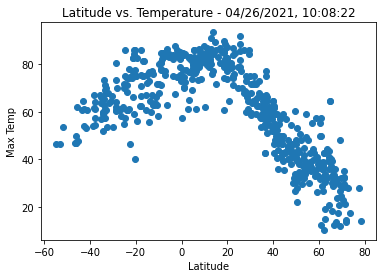

In [24]:
plt.scatter(city_data['Lat'], city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Latitude vs. Temperature - {time_string}')
plt.savefig("Images/Latitude_Temperature.png")
plt.show()


## Latitude vs. Humidity Plot

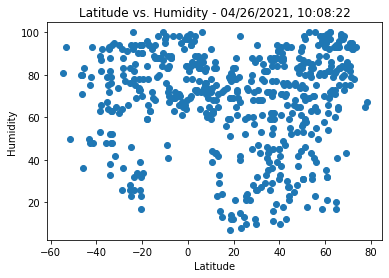

In [25]:
plt.scatter(city_data['Lat'], city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity - {time_string}')
plt.savefig("Images/Latitude_Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

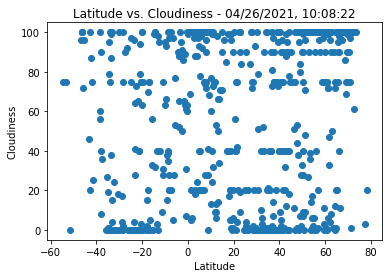

In [26]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness - {time_string}')
plt.savefig("Images/Latitude_Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

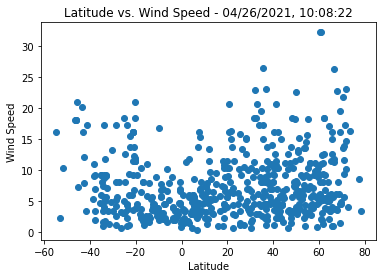

In [27]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs. Wind Speed - {time_string}')
plt.savefig("Images/Latitude_Wind.png")
plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

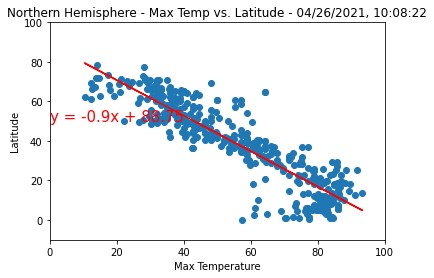

In [28]:
# Locate northern hemisphere data 
north_city_data = city_data.loc[(city_data['Lat'] > 0)]

# Northern hemisphere Max Temp vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data['Max Temp'], north_city_data['Lat'])
regress_values = north_city_data['Max Temp'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_city_data['Max Temp'], north_city_data['Lat'])
plt.plot(north_city_data['Max Temp'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude - {time_string}')
plt.xlim(0, 100)
plt.ylim(-10, 100)
plt.savefig("Images/North_Max_Temp_Latitude.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

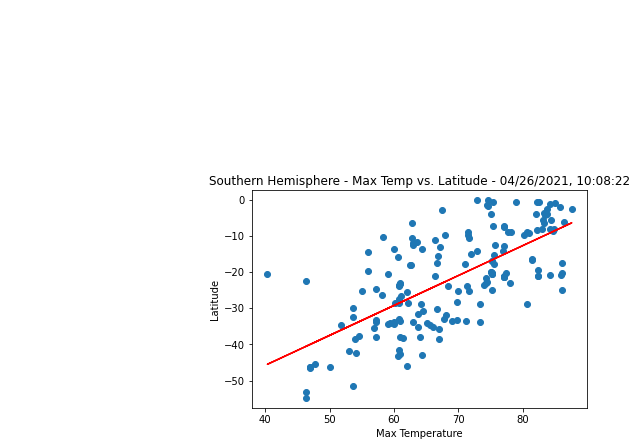

In [29]:
south_city_data = city_data.loc[(city_data['Lat'] < 0)]

# Southern hemisphere Max Temp vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data['Max Temp'], south_city_data['Lat'])
regress_values = south_city_data['Max Temp'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_city_data['Max Temp'], south_city_data['Lat'])
plt.plot(south_city_data['Max Temp'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude - {time_string}')
plt.savefig("Images/South_Max_Temp_Latitude.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

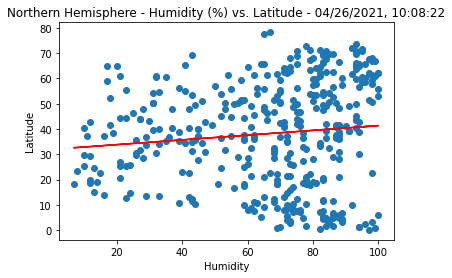

In [30]:
# Northern hemisphere Humidity % vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data['Humidity'], north_city_data['Lat'])
regress_values = north_city_data['Humidity'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_city_data['Humidity'], north_city_data['Lat'])
plt.plot(north_city_data['Humidity'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude - {time_string}')
plt.savefig("Images/North_Humidity_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

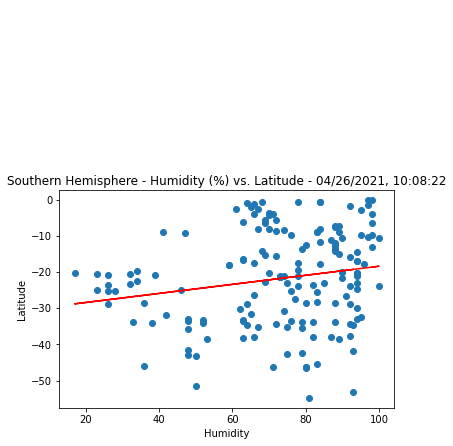

In [31]:
# Southern hemisphere Humidity % vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data['Humidity'], south_city_data['Lat'])
regress_values = south_city_data['Humidity'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_city_data['Humidity'], south_city_data['Lat'])
plt.plot(south_city_data['Humidity'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude - {time_string}')
plt.savefig("Images/South_Humidity_Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

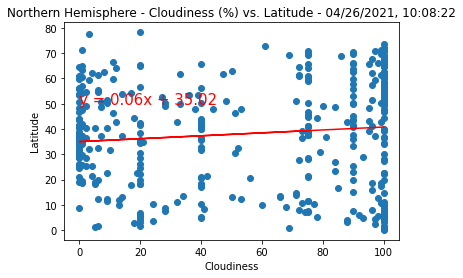

In [35]:
# Northern hemisphere Cloudiness % vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data['Cloudiness'], north_city_data['Lat'])
regress_values = north_city_data['Cloudiness'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_city_data['Cloudiness'], north_city_data['Lat'])
plt.plot(north_city_data['Cloudiness'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude - {time_string}')
plt.savefig("Images/North_Cloudiness_Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

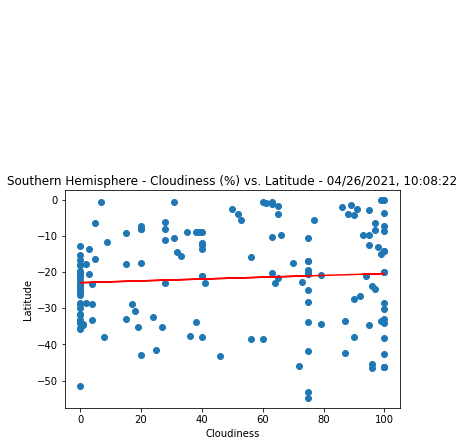

In [36]:
# Southern hemisphere loudiness % vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data['Cloudiness'], south_city_data['Lat'])
regress_values = south_city_data['Cloudiness'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_city_data['Cloudiness'], south_city_data['Lat'])
plt.plot(south_city_data['Cloudiness'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude - {time_string}')
plt.savefig("Images/South_Cloudiness_Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

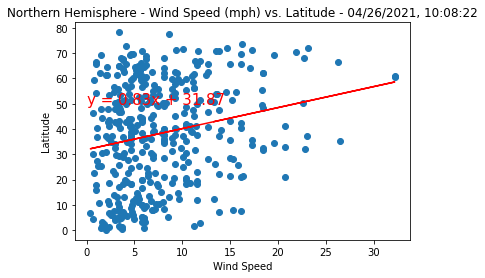

In [37]:
# Northern hemisphere Wind Speed (mph) vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data['Wind Speed'], north_city_data['Lat'])
regress_values = north_city_data['Wind Speed'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_city_data['Wind Speed'], north_city_data['Lat'])
plt.plot(north_city_data['Wind Speed'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude - {time_string}')
plt.savefig("Images/North_Wind_Speed_Latitude.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

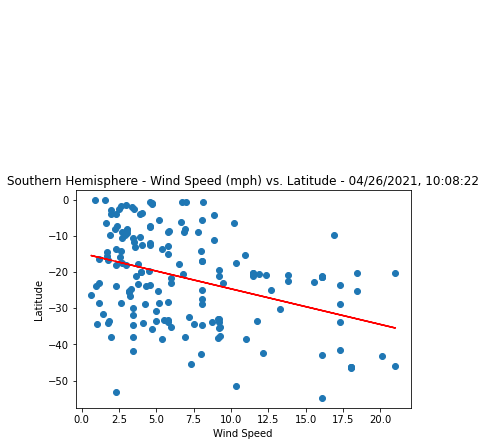

In [38]:
# Southern hemisphere Wind Speed (mph) vs Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data['Wind Speed'], south_city_data['Lat'])
regress_values = south_city_data['Wind Speed'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_city_data['Wind Speed'], south_city_data['Lat'])
plt.plot(south_city_data['Wind Speed'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude - {time_string}')
plt.savefig("Images/South_Wind_Speed_Latitude.png")
plt.show()